# Klong beam pipe inner diameter study

Analysis of results from the 5B photon simulation of the KLF beamline, take 10, looking at variation of rates with the inner radius of the klong beam pipe.

In [1]:
import ROOT
#%jsroot on
import os
os.chdir("/srv/jupyter/hdgeant4 studies")
import pyxrootd.client as xclient
import numpy as np
#%pip install --user "gluex.jupyroot>=1.0.10"
from gluex.jupyroot.treeview import treeview

In [2]:
xrdurl = "root://cn445.storrs.hpc.uconn.edu"
xrdpath = "/Gluex/resilient/simulation/KLFbeam-8-2024/"
rfile1 = ROOT.TFile.Open(xrdurl + xrdpath + "bgprofiles10_1.root")
det5 = rfile1.Get("det5")
chain = ROOT.TChain(det5.GetName(), det5.GetTitle())
xfs = xclient.FileSystem(xrdurl)
for f in xfs.dirlist(xrdpath)[1]['dirlist']:
    if "bgprofiles10_" in f['name']:
        chain.Add(xrdurl + xrdpath + f['name'])
print("chain", chain.GetName(), "created with", chain.GetNtrees(), "files")
tview = treeview(chain, "Klong_beam10.root/det5")
tviewa = treeview(chain, "Klong_beam11.root/det5")
tview10 = treeview(chain, "Klong_hits10.root")
tview11 = treeview(chain, "Klong_hits11.root")

chain det5 created with 9851 files


In [3]:
def scale_errors(h1d, factor=1):
    """
    Rescale the errors on the contents of a 1d histogram by factor.
    """
    for i in range(h1d.GetNbinsX()):
        h1d.SetBinError(i+1, h1d.GetBinError(i+1) * factor)

## Particle rates at the GlueX target vs final beam pipe inner diameter

klong slope parameter 417.46 +/- 54.77 cm
klong slope parameter 282.21 +/- 62.72 cm


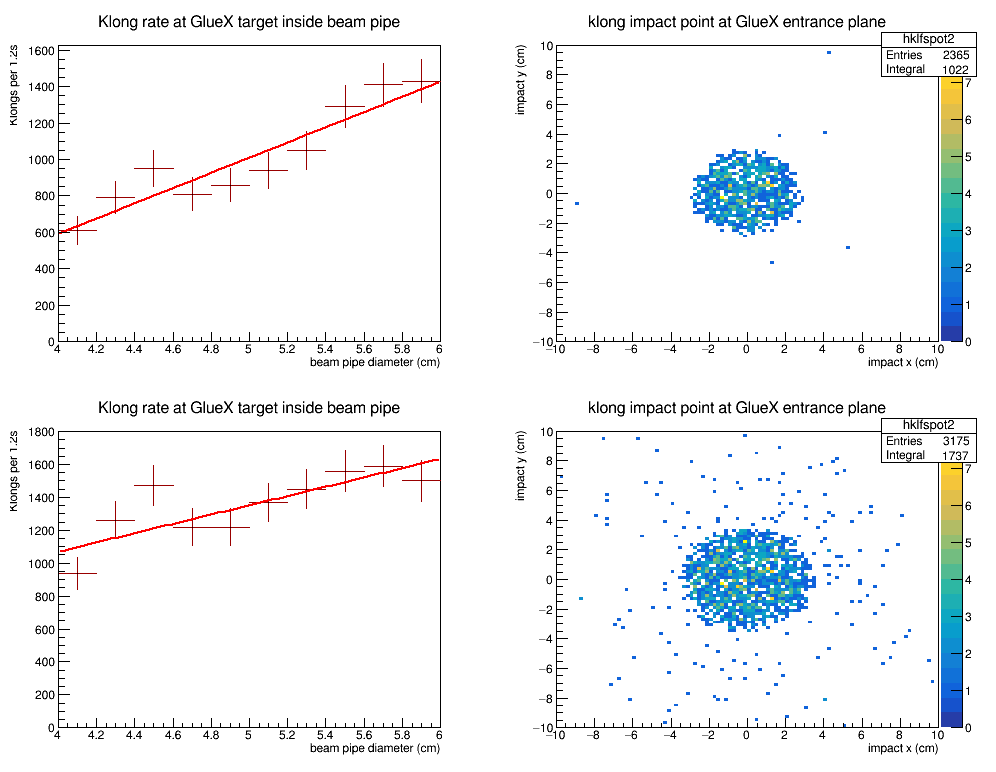

In [4]:
n = tview.draw([['hrunklong', 'hklfspot2'] for i in range(2)],
               [['', 'colz'] for i in range(2)], stats="ien")
ipane = 1
for tv in (tview, tviewa):
    tview.current_canvas.cd(ipane)
    hrunklong = tv.get('hrunklong')
    hrunklong.SetLineColor(ROOT.kRed + 2)
    ROOT.gStyle.SetOptFit(1111)
    hrunklong.SetTitle("Klong rate at GlueX target inside beam pipe")
    hrunklong.GetXaxis().SetLimits(4, 6)
    hrunklong.GetXaxis().SetTitle("beam pipe diameter (cm)")
    hrunklong.GetYaxis().SetTitle("Klongs per 1.2s")
    hrunklong.Rebin(20)
    hrunklong.Scale(hrunklong.GetNbinsX())
    hrunklong.SetStats(0)
    hrunklong.SetMinimum(0)
    hrunklong.Fit('pol1', 'q')
    slope = hrunklong.GetListOfFunctions().FindObject('pol1').GetParameter(1)
    sloperr = hrunklong.GetListOfFunctions().FindObject('pol1').GetParError(1)
    print(f"klong slope parameter {slope:0.2f} +/- {sloperr:0.2f} cm")
    ipane += 2
tview.current_canvas.cd(4)
tviewa.get('hklfspot2').Draw('colz')
tview.current_canvas.cd(0)
tview.current_canvas.Draw()

gamma slope parameter is 123230.839 +/- 1030.302 cm
gamma slope parameter is 106571.424 +/- 1132.354 cm


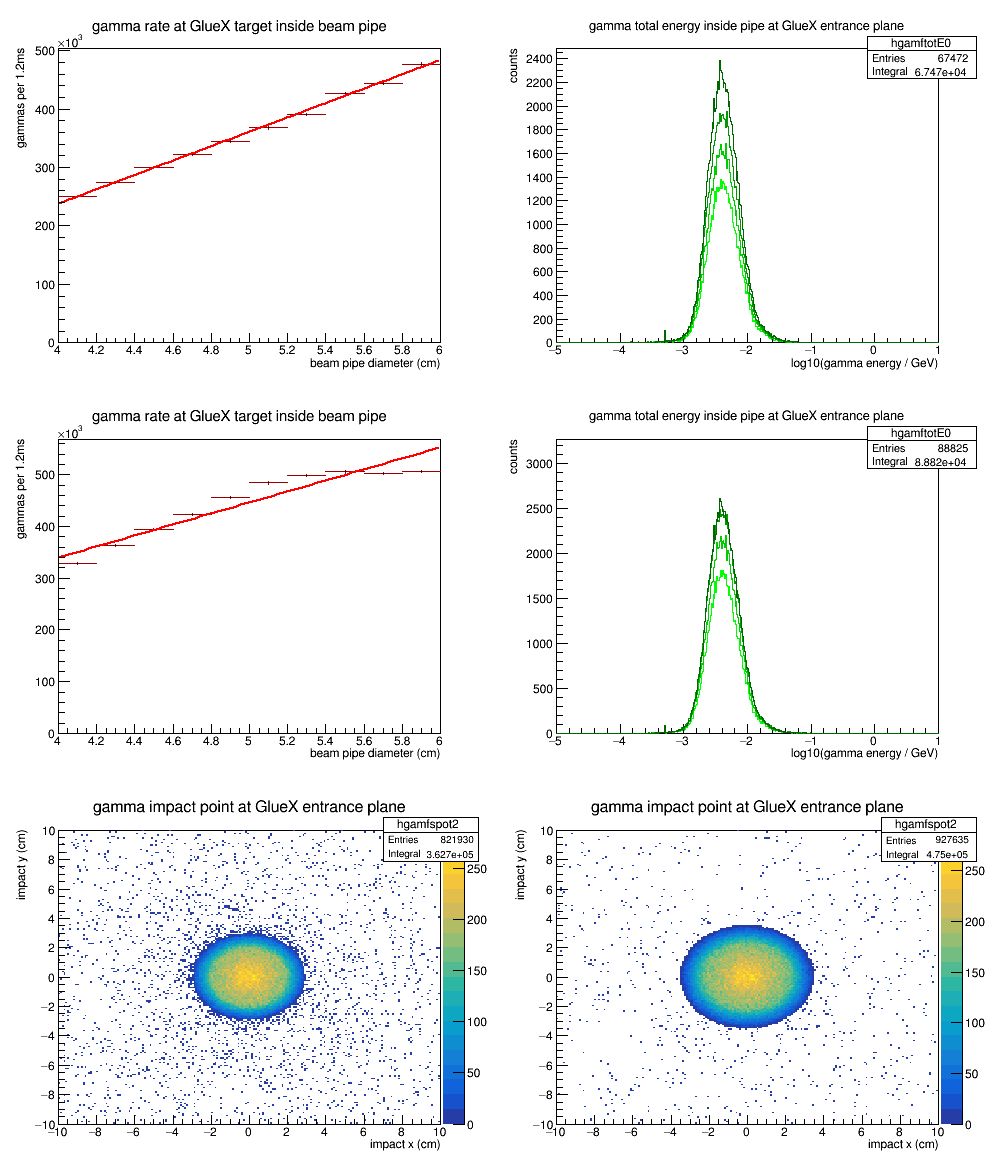

In [20]:
n = tview.draw([['hrungamma', 'hrungamma'], ['hrungamma', 'hrungamma'], ['hgamfspot2',]],
               [['', ''], ['', ''], ['colz',]], stats="ien")
ipane = 1
for tv in (tview, tviewa):
    tview.current_canvas.cd(ipane)
    hrungamma = tv.get('hrungamma')
    hrungamma.SetLineColor(ROOT.kRed + 2)
    ROOT.gStyle.SetOptFit(1111)
    hrungamma.SetTitle("gamma rate at GlueX target inside beam pipe")
    hrungamma.GetXaxis().SetLimits(4,6)
    hrungamma.GetXaxis().SetTitle("beam pipe diameter (cm)")
    hrungamma.GetYaxis().SetTitle("gammas per 1.2ms")
    hrungamma.Rebin(20)
    hrungamma.Scale(hrungamma.GetNbinsX())
    hrungamma.SetMinimum(0)
    hrungamma.SetStats(0)
    hrungamma.Fit('pol1', 'q')
    slope = hrungamma.GetListOfFunctions().FindObject('pol1').GetParameter(1)
    sloperr = hrungamma.GetListOfFunctions().FindObject('pol1').GetParError(1)
    print(f"gamma slope parameter is {slope:0.3f} +/- {sloperr:0.3f} cm")
    tview.current_canvas.cd(ipane + 1)
    ROOT.gStyle.SetStatW(0.25)
    ROOT.gStyle.SetStatH(0.08)
    hgamftotE = [0]*4
    opt = ''
    for i in range(4):
        hgamftotE[i] = tv.get(f'hgamftotE{i}')
        if i == 0:
            hgamftotE[i].SetMaximum(hgamftotE[i].GetMaximum() * 1.8)
        hgamftotE[i].SetLineColor(ROOT.kGreen + i)
        hgamftotE[i].Draw(opt)
        opt = 'same'
        tview.current_canvas.Update()
        for f in hgamftotE[i].GetListOfFunctions():
            f.SetX1NDC(0.75)
            f.SetY1NDC(0.82)
    ipane += 2
tview.current_canvas.cd(6)
tviewa.get("hgamfspot2").Draw('colz')
ROOT.gStyle.SetStatW(statw)
ROOT.gStyle.SetStatH(stath)
tviewa.get("hgamfspot2").Draw('colz')
#tview.current_canvas.cd(0)
#tview.current_canvas.Draw()

neutron slope paraemter is 196.09 +/- 51.73 cm
neutron slope paraemter is 160.17 +/- 57.61 cm


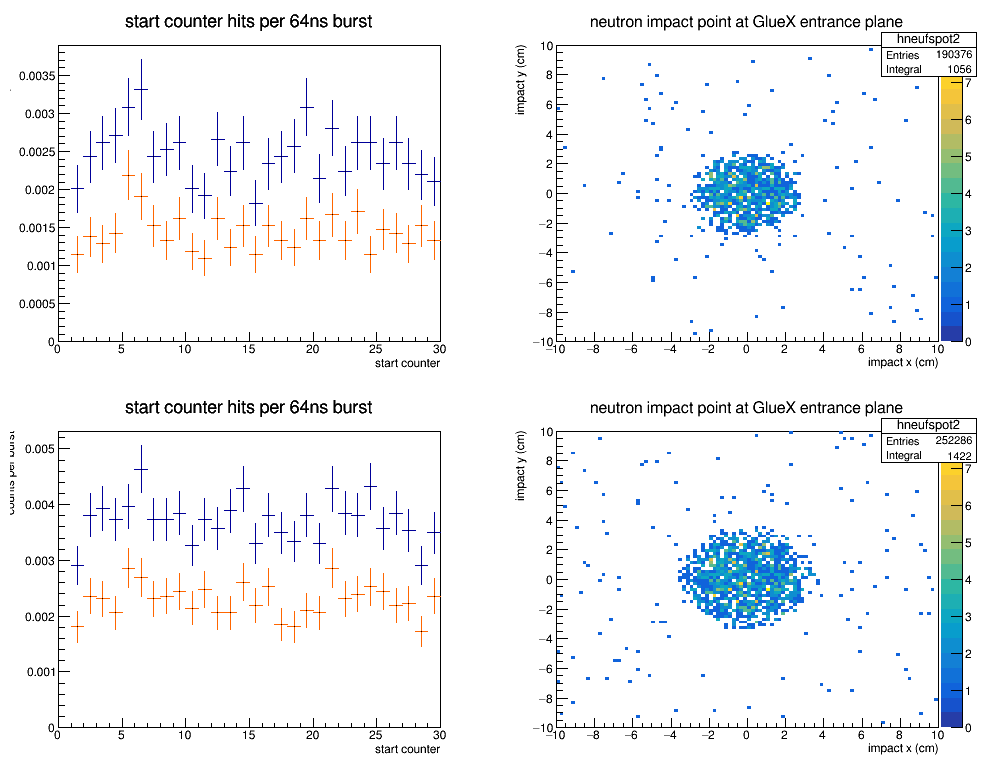

In [21]:
n = tview.draw([['hrunneutron', 'hneufspot2'], ['hrunneutron', 'hneufspot2']],
               [['', 'colz'], ['', 'colz']], stats="ien")
ipane = 1
for tv in (tview, tviewa):
    tview.current_canvas.cd(ipane)
    hrunneutron = tv.get('hrunneutron')
    hrunneutron.SetLineColor(ROOT.kBlue - 1)
    ROOT.gStyle.SetOptFit(1111)
    hrunneutron.SetTitle("neutron rate at GlueX target inside beam pipe")
    hrunneutron.GetXaxis().SetLimits(4,6)
    hrunneutron.GetXaxis().SetTitle("beam pipe diameter (cm)")
    hrunneutron.GetYaxis().SetTitle("neutrons per 1.2ms")
    hrunneutron.Rebin(20)
    hrunneutron.Scale(hrunneutron.GetNbinsX())
    hrunneutron.SetMinimum(0)
    hrunneutron.SetStats(0)
    hrunneutron.Fit('pol1', 'q')
    expo = hrunneutron.GetListOfFunctions().FindObject('pol1')
    slope = expo.GetParameter(1)
    sloperr = expo.GetParError(1)
    print(f"neutron slope paraemter is {slope:0.2f} +/- {sloperr:0.2f} cm")
    ipane += 2
tview.current_canvas.cd(4)
tviewa.get("hneufspot2").Draw("colz")

## Plot detector hit rates normalized to the 64ns pulse period

In [7]:
hnorm = {}

start counter rate slope parameter is 0.02 +/- 0.01 cm
start counter rate slope parameter is 0.03 +/- 0.01 cm
****************************************
Minimizer is Linear / Migrad
Chi2                      =      2.87263
NDf                       =            8
p0                        =   -0.0418083   +/-   0.0275096   
p1                        =    0.0178711   +/-   0.0056027   
****************************************
Minimizer is Linear / Migrad
Chi2                      =      12.3936
NDf                       =            8
p0                        =   -0.0762544   +/-   0.0381444   
p1                        =    0.0320874   +/-   0.00776014  


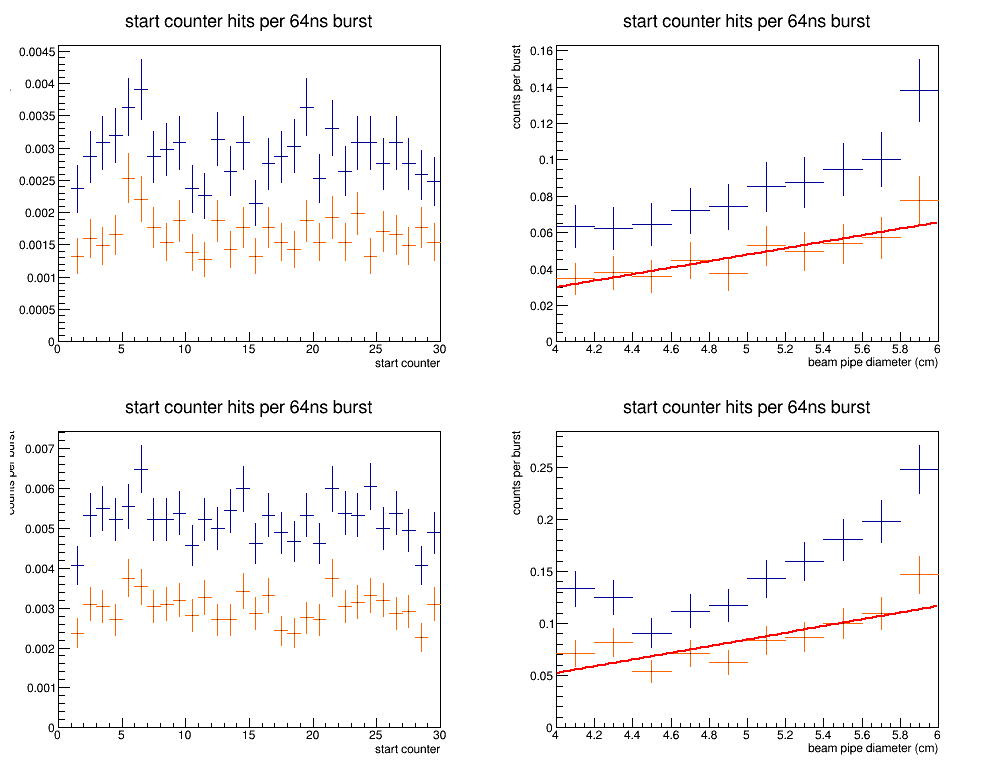

In [28]:
tview10.draw([['hsc', 'hsc'], ['hsc', 'hsc']], stats="ien")
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hsc', 'hsc_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("start counter hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].GetXaxis().SetRangeUser(0, 30)
        hnorm[hname2].SetStats(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
ipane = 2
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hscrun', 'hscrun_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("start counter hits per 64ns burst")
        hnorm[hname2].Rebin(100)
        scale_errors(hnorm[hname2], 2)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        hnorm[hname2].GetXaxis().SetLimits(4,6)
        hnorm[hname2].GetXaxis().SetTitle("beam pipe diameter (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    hnorm[hname2].Fit("pol1", "")
    slope = hnorm[hname2].GetListOfFunctions().FindObject('pol1').GetParameter(1)
    sloperr = hnorm[hname2].GetListOfFunctions().FindObject('pol1').GetParError(1)
    print(f"start counter rate slope parameter is {slope:0.2f} +/- {sloperr:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hsc': 'hscrun', 'hsc_dEmin': 'hscrun_dEmin'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane+1}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,10)/10 / hnorm[hname2].Integral())
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
cname = tview10.current_canvas.GetName()
tview10.canvases[cname].cd(0)
tview10.canvases[cname].Draw()

In [ ]:
def expo2f(var,par):
    x = [par[0] + par[1] * (var[0] - 10), par[2] + par[3] * (var[0] - 10)]
    sum = 0
    for i in range(2):
        if x[i] > -100 and x[i] < 100:
            sum += np.exp(x[i])
        else:
            sum += 1e9
    return sum

cdc rate slope parameters are 0.03 +/- 0.01 cm and
cdc rate slope parameters are 0.02 +/- 0.01 cm and
****************************************
Minimizer is Linear / Migrad
Chi2                      =      12.8049
NDf                       =           18
p0                        =   -0.0763216   +/-   0.0429137   
p1                        =    0.0268884   +/-   0.00881533  
****************************************
Minimizer is Linear / Migrad
Chi2                      =      24.6511
NDf                       =           18
p0                        =   -0.0106055   +/-   0.0646916   
p1                        =    0.0239253   +/-   0.0130346   


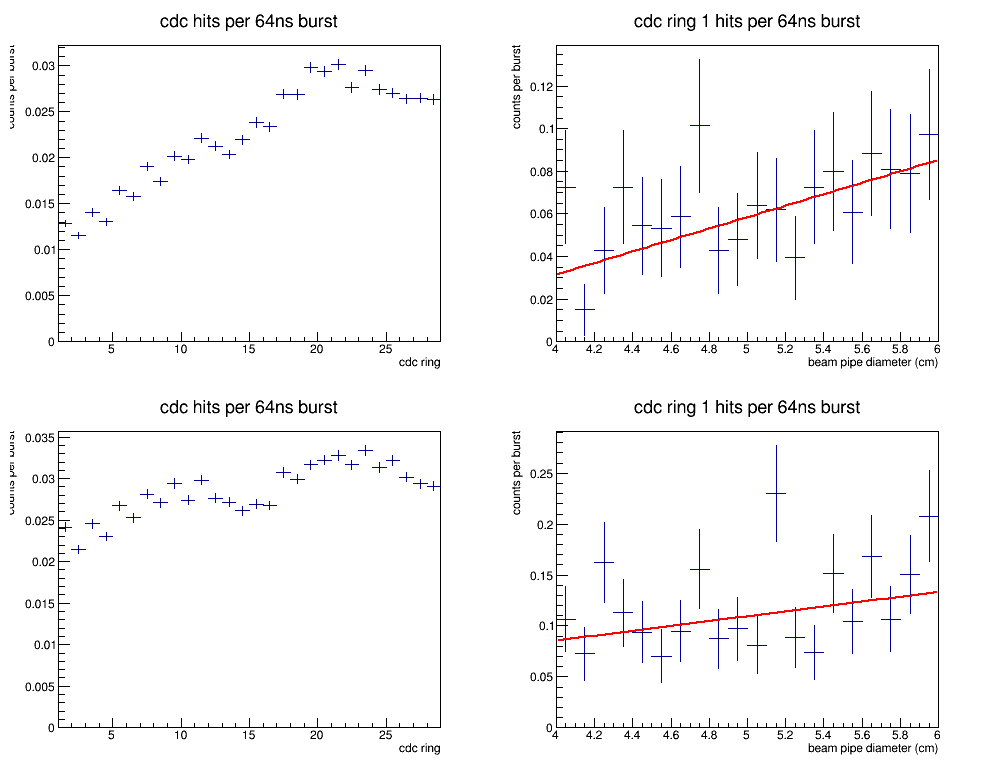

In [33]:
tview10.draw([['hcdc', 'hcdc'], ['hcdc', 'hcdc']], stats="ien")
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hcdc',):
        horig = tv.get(hname).ProjectionY()
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("cdc hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
ipane = 2
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hcdcrun',):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("cdc ring 1 hits per 64ns burst")
        hnorm[hname2].Rebin(50)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 3)
        hnorm[hname2].GetXaxis().SetLimits(4,6)
        hnorm[hname2].GetXaxis().SetTitle("beam pipe diameter (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    hnorm[hname2].Fit("pol1", "")
    slope = hnorm[hname2].GetListOfFunctions().FindObject('pol1').GetParameter(1)
    sloperr = hnorm[hname2].GetListOfFunctions().FindObject('pol1').GetParError(1)
    print(f"cdc rate slope parameters are", f"{slope:0.2f} +/- {sloperr:0.2f} cm and")
    ipane += 2
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hcdc': 'hcdcrun'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane+1}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,100)/100 / hnorm[hname2].Integral(1,1))
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
tview10.current_canvas.cd(0)
tview10.current_canvas.Draw()

fdc rate slope parameters are 0.12 +/- 0.01 cm
fdc rate slope parameters are 0.11 +/- 0.01 cm


Warning in <TH1D::Rebin>: ngroup=10000 is not an exact divider of nbins=91000.
Warning in <TH1D::Rebin>: ngroup=10000 is not an exact divider of nbins=91000.


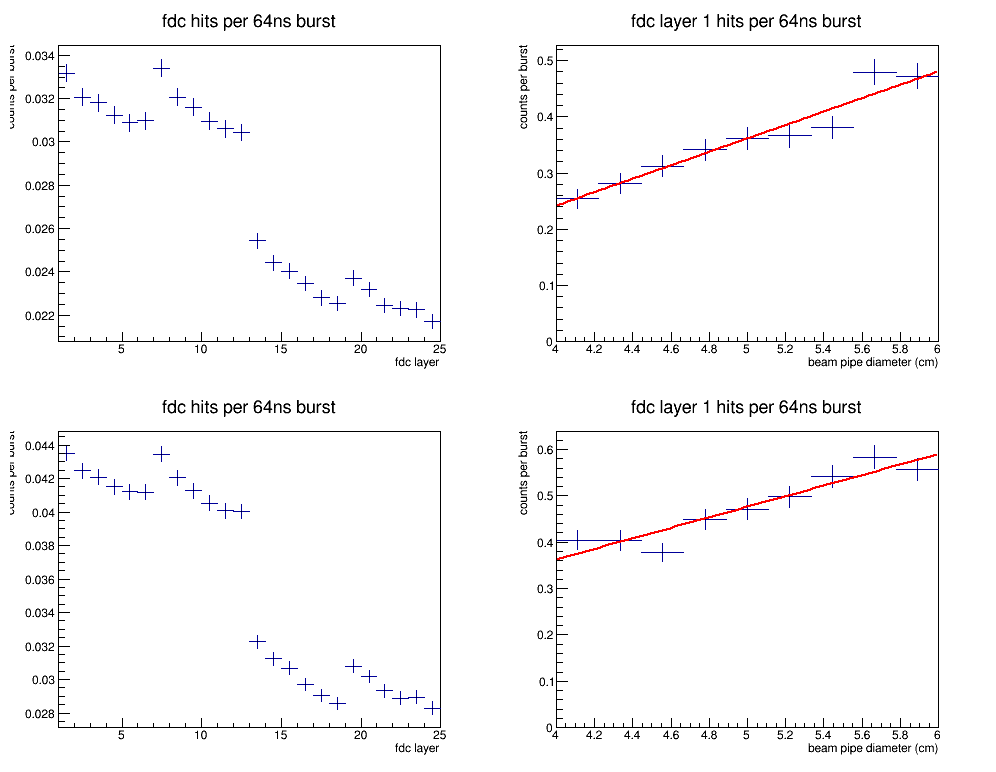

In [39]:
tview10.draw([['hfdc', 'hfdc'], ['hfdc', 'hfdc']], stats="ien")
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hfdc',):
        horig = tv.get(hname).ProjectionY()
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("fdc hits per 64ns burst")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
ipane = 2
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hfdcrun',):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("fdc layer 1 hits per 64ns burst")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].Rebin(10000)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 1.5)
        hnorm[hname2].GetXaxis().SetLimits(4,6)
        hnorm[hname2].GetXaxis().SetTitle("beam pipe diameter (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    hnorm[hname2].Fit("pol1", "q")
    slope = hnorm[hname2].GetListOfFunctions().FindObject('pol1').GetParameter(1)
    sloperr = hnorm[hname2].GetListOfFunctions().FindObject('pol1').GetParError(1)
    print(f"fdc rate slope parameters are", f"{slope:0.2f} +/- {sloperr:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hfdc': 'hfdcrun'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane+1}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,100)/100 / hnorm[hname2].Integral(1,1))
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
tview10.current_canvas.cd(0)
tview10.current_canvas.Draw()

bcal rate slope parameters are 0.11 +/- 0.07 cm
bcal rate slope parameters are 0.07 +/- 0.07 cm


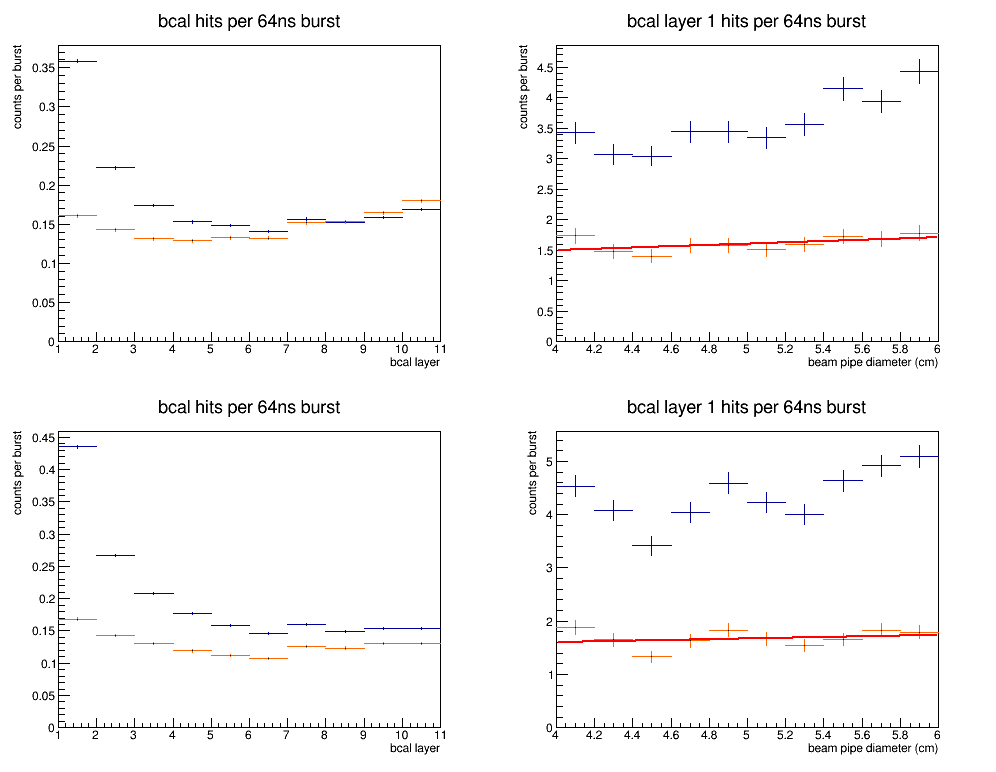

In [45]:
tview10.draw([['hbcal', 'hbcal'], ['hbcal', 'hbcal']], stats="ien")
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hbcal', 'hbcal_dEmin'):
        horig = tv.get(hname).ProjectionY()
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("bcal hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    tview10.current_canvas.cd(ipane + 1)
    draw_option = ""
    for hname in ('hbcalrun', 'hbcalrun_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("bcal layer 1 hits per 64ns burst")
        hnorm[hname2].Rebin(100)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 4)
        hnorm[hname2].GetXaxis().SetLimits(4,6)
        hnorm[hname2].GetXaxis().SetTitle("beam pipe diameter (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    hnorm[hname2].Fit("pol1", "q")
    slope = hnorm[hname2].GetListOfFunctions().FindObject('pol1').GetParameter(1)
    sloperr = hnorm[hname2].GetListOfFunctions().FindObject('pol1').GetParError(1)
    print(f"bcal rate slope parameters are", f"{slope:0.2f} +/- {sloperr:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hbcal': 'hbcalrun', 'hbcal_dEmin': 'hbcalrun_dEmin'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,100)/100 / hnorm[hname2].Integral(1,1))
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
tview10.current_canvas.cd(0)
tview10.current_canvas.Draw()

fcal rate slope parameter is 0.02 +/- 0.01 cm
fcal rate slope parameter is 0.00 +/- 0.01 cm


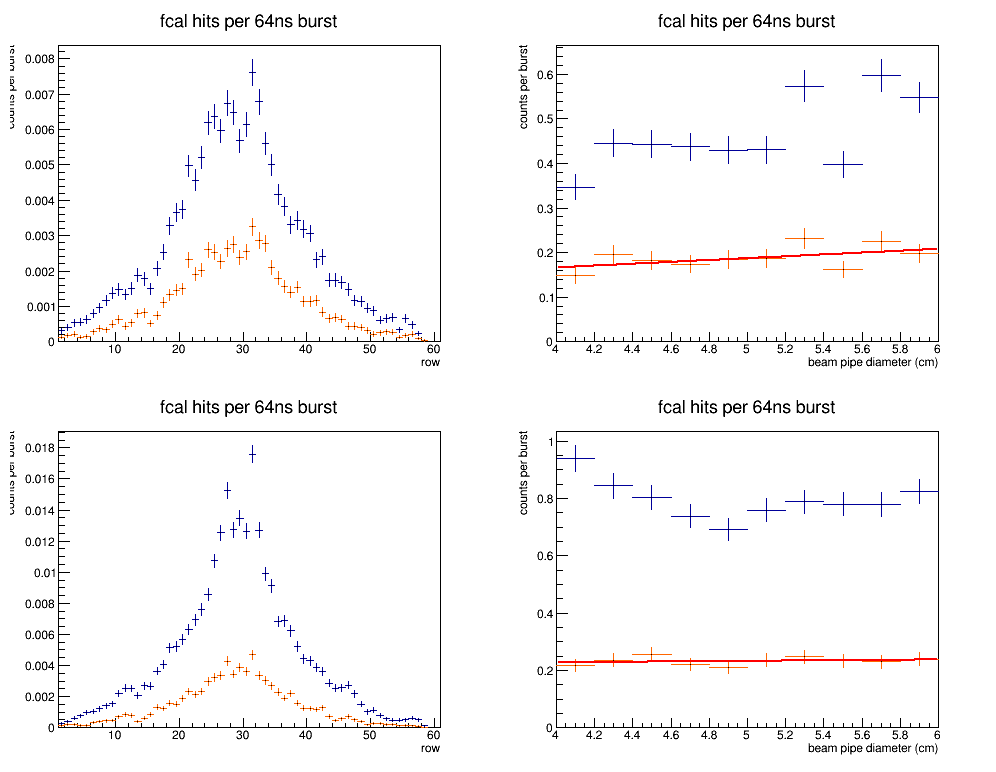

In [49]:
tview10.draw([['hfcal', 'hfcal'], ['hfcal', 'hfcal']], stats="ien")
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hfcal', 'hfcal_dEmin'):
        horig = tv.get(hname).ProjectionY()
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("fcal hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    tview10.current_canvas.cd(ipane + 1)
    draw_option = ""
    for hname in ('hfcalrun', 'hfcalrun_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("fcal hits per 64ns burst")
        hnorm[hname2].Rebin(100)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 2)
        hnorm[hname2].GetXaxis().SetLimits(4,6)
        hnorm[hname2].GetXaxis().SetTitle("beam pipe diameter (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    hnorm[hname2].Fit('pol1', 'q')
    pol1 = hnorm[hname2].GetListOfFunctions().FindObject('pol1')
    slope = pol1.GetParameter(1)
    sloperr = pol1.GetParError(1)
    print("fcal rate slope parameter is", f"{slope:.2f} +/- {sloperr:.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hfcal': 'hfcalrun', 'hfcal_dEmin': 'hfcalrun_dEmin'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,30)/30 / hnorm[hname2].Integral())
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
tview10.current_canvas.cd(0)
tview10.current_canvas.Draw()

ftof rate slope parameter is  0.08 +/- 0.01 cm
ftof rate slope parameter is  0.05 +/- 0.02 cm


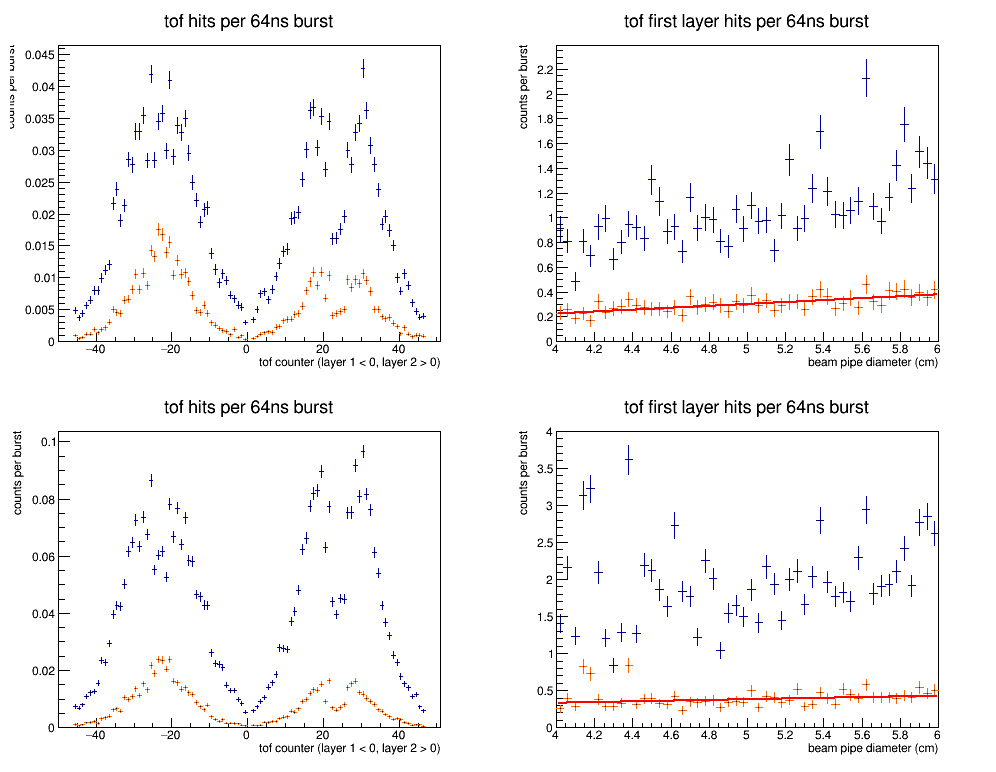

In [53]:
tview10.draw([['htof', 'htof'], ['htof', 'htof']], stats="ien")
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('htof', 'htof_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("tof hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    tview10.current_canvas.cd(ipane + 1)
    draw_option = ""
    for hname in ('htofrun', 'htofrun_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("tof first layer hits per 64ns burst")
        hnorm[hname2].Rebin(20)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 2)
        hnorm[hname2].GetXaxis().SetLimits(4,6)
        hnorm[hname2].GetXaxis().SetTitle("beam pipe diameter (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    hnorm[hname2].Fit('pol1', "q")
    pol1 = hnorm[hname2].GetListOfFunctions().FindObject('pol1')
    slope = pol1.GetParameter(1)
    sloperr = pol1.GetParError(1)
    print(f"ftof rate slope parameter is ", f"{slope:.2f} +/- {sloperr:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview10, tview11):
    tview10.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'htof': 'htofrun', 'htof_dEmin': 'htofrun_dEmin'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,30)/30 / hnorm[hname2].Integral(1,hnorm[hname2].FindBin(0)))
        draw_option = "same"
    ipane += 2
tview10.current_canvas.cd(0)
tview10.current_canvas.Draw()